In [ ]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ..

from __future__ import division

import os
import us
import requests

import pandas as pd
import geopandas as gpd

from utils.settings import (blocks_2010_shapefile_dir, acs5_shapefile_dir)

In [2]:
state = u'new york'
state_fips = us.states.lookup(state).fips
state_fips

u'36'

In [3]:
# try:
if True:
    print 'Attempting to load predicted population by block for:', state
#     df = gpd.read_file(blocks_geojson_filename)
# except IOError:
    print '\tNot found on disk...'
    print '\tDownloading and processing blocks and block groups for:', state
    # Open 2010 blocks for state (the population):
    print '\tOpening 2010 blocks shapefile for:', state
    blocks_2010_shapefile_name = blocks_2010_shapefile_dir + 'tabblock2010_' +\
        state_fips + '_pophu.shp'
    blocks_df = gpd.read_file(blocks_2010_shapefile_name)
    blocks_df['BLOCKID10'] = blocks_df['BLOCKID10'].apply(str)
    def get_group_GEOID(blockGEOID):
        return blockGEOID[0:-3]
    blocks_df['Block Group GEOID'] = blocks_df['BLOCKID10'].apply(get_group_GEOID)
    assert (blocks_df['Block Group GEOID'].apply(len)).unique() == [12]
    # The filename for the whole state with block groups (without population):
    print '\tOpening ACS5 block groups shapefile for:', state
    block_groups_shapefile_name = acs5_shapefile_dir + 'tl_' + year + '_' +\
        state_fips + '_bg.shp'
    block_groups_df = gpd.read_file(block_groups_shapefile_name)
    # We will add to this the population per block group from the API.
    # Check GEOIDs are of length 12 because they have to be by definition,
    # see: https://www.census.gov/geo/reference/geoidentifiers.html
    assert (block_groups_df['GEOID'].apply(len)).unique() == [12]

    
    
    
    print set(block_groups_df['GEOID'].unique()).symmetric_difference(set(
        blocks_df['Block Group GEOID'].unique()))
        # ['060378002043', '060379304011', u'060371370002', u'060371370001']

Attempting to load predicted population by block for: new york
	Not found on disk...
	Opening 2010 blocks shapefile for: new york
	Opening ACS5 block groups shapefile for: new york
set([u'360530302003', u'360650248001', '360539406004', '360539406001', '360539406002', '360539406003', '360659400002', '360659400001', u'360650249002', '360539407002', '360539407001', '360539404033', '360539404032', '360539404031', u'360530304013', u'360530304012', '360539404015', '360539404014', '360539404011', '360539404013', '360539404012', u'360650247004', u'360650248002', u'360530304032', u'360530304031', '360539401011', u'360530303001', '360539401023', '360539401022', '360539401021', '360539401024', u'360530301031', u'360650247001', u'360650247003', u'360650247002', '360539402002', '360539402003', u'360530302001', u'360530302002', u'360530304021', u'360530304022', '360539403003', '360539403002', '360539403001', '360539403004', u'360530304033', u'360530301023', u'360530301022', u'360530301021', u'360530

In [4]:
diff = list(set(block_groups_df['GEOID'].unique()).symmetric_difference(set(
         blocks_df['Block Group GEOID'].unique())))
len(diff)

79

In [5]:
for d in diff:
    if d in blocks_df['Block Group GEOID'].values:
        print d

360539406004
360539406001
360539406002
360539406003
360659400002
360659400001
360539407002
360539407001
360539404033
360539404032
360539404031
360539404015
360539404014
360539404011
360539404013
360539404012
360539401011
360539401023
360539401022
360539401021
360539401024
360539402002
360539402003
360539403003
360539403002
360539403001
360539403004
360659401001
360659401002
360659401003
360659401004
360659402001
360659402003
360659402002
360539401031
360539401032
360539401033
360850089000
360539402001
360539401012


In [6]:
#These are the block groups that get lost:
for i, d in enumerate(diff):
    try:
        lost_block_groups = pd.concat([lost_block_groups,
                                      block_groups_df[block_groups_df['GEOID'].astype(str).str.contains(d)]])
    except NameError:
        lost_block_groups = block_groups_df[block_groups_df['GEOID'].astype(str).str.contains(d)]
lost_block_groups.shape

(39, 13)

In [7]:
lost_block_groups

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,STATEFP,TRACTCE,geometry
11585,29541172,28212,3,053,S,360530302003,+43.0843950,-075.7127800,G5030,Block Group 3,36,030200,"POLYGON ((-75.808307 43.110344, -75.806906 43...."
9691,2002638,0,1,065,S,360650248001,+43.0719459,-075.6091813,G5030,Block Group 1,36,024800,"POLYGON ((-75.622213 43.073846, -75.6220079999..."
5728,2406981,8875,2,065,S,360650249002,+43.0791945,-075.5385608,G5030,Block Group 2,36,024900,"POLYGON ((-75.552217 43.081056, -75.552341 43...."
13342,20969747,55318,3,053,S,360530304013,+43.1261230,-075.8882249,G5030,Block Group 3,36,030401,"POLYGON ((-75.933294 43.152476, -75.933272 43...."
13331,29148474,130000,2,053,S,360530304012,+43.1047003,-075.9362128,G5030,Block Group 2,36,030401,"POLYGON ((-75.976423 43.102884, -75.9763959999..."
10228,93668426,527108,4,065,S,360650247004,+43.1716048,-075.6109376,G5030,Block Group 4,36,024700,"POLYGON ((-75.678462 43.169883, -75.677678 43...."
5069,3984041,0,2,065,S,360650248002,+43.0696808,-075.5942065,G5030,Block Group 2,36,024800,"POLYGON ((-75.61121399999999 43.081803, -75.61..."
13346,4082150,4283,2,053,S,360530304032,+43.0543998,-075.8926475,G5030,Block Group 2,36,030403,"POLYGON ((-75.911497 43.053862, -75.9114759999..."
13460,2876669,6041,1,053,S,360530304031,+43.0575498,-075.8672038,G5030,Block Group 1,36,030403,"POLYGON ((-75.884872 43.065909, -75.884586 43...."
9271,3480612,11227,1,053,S,360530303001,+43.0876370,-075.7453450,G5030,Block Group 1,36,030300,"POLYGON ((-75.760205 43.09693499999999, -75.75..."


In [13]:
print len(set(block_groups_df['GEOID'].unique()).difference(set(blocks_df['Block Group GEOID'].unique())))


39


In [14]:
print len(set(blocks_df['Block Group GEOID'].unique()).difference(set(block_groups_df['GEOID'].unique())))

40


In [15]:
print blocks_df[blocks_df['Block Group GEOID'] == '040194705002']['POP10']

Series([], Name: POP10, dtype: int64)


In [16]:
print blocks_df[blocks_df['Block Group GEOID'] == '060371370001']['POP10']

Series([], Name: POP10, dtype: int64)


In [17]:
# Code to get the total estimated population from the census files:
api_population = 'B01003_001E'  # http://api.census.gov/data/2015/acs5/variables.html
# NB: this is not the same code in the shapefiles for each block from the 2010
# census, which instead uses 'POP10'.
# Get all the counties' IDs so we can d/l each county's population per
# block group:
def block_group_to_county_geoid(geoid):
    return geoid[2:5]
block_groups_df['County'] = block_groups_df['GEOID'].apply(block_group_to_county_geoid)
block_groups_for_state = acs5_population_dir + state + '.json'
try:
    print '\tAttempting to load ACS5 population for block groups by county for:', state
    with open(block_groups_for_state, 'r') as infile:
        population_df = pd.read_json(infile)
except IOError:
    print '\t\tNot found on disk...'
    counties = block_groups_df['County'].unique()
    for county in counties:
        print '\t\tDownloading block groups for county:', county
        url = 'http://api.census.gov/data/' + year + '/acs5?get=NAME,' +\
            api_population + '&for=block+group:*&in=state:' + \
            state_fips + '+county:' + county + '&key=' + apikey
        # Make a get request to get the population of each county per block
        # group:
        response = requests.get(url)
        try:
            data = response.json()
        except ValueError:  # includes simplejson.decoder.JSONDecodeError
            # This is what happens when the server times out etc.
            print 'Decoding JSON has failed. Server response:',\
                response.status_code
            exit()
        # Merge the df to get one huge df for the whole state which contains
        # all the group blocks and their populations:
        columns = data.pop(0) # columns as list and leaves data intact
        try:
            # Try appending to previous population_df:
            population_df = population_df.append(
                pd.DataFrame(data, columns=columns),
                ignore_index=True)
        except NameError:
            # There is no previous, so create it:
            population_df = pd.DataFrame(data, columns=columns)
    population_df.to_json(block_groups_for_state)
print '\tDone!'

	Attempting to load ACS5 population for block groups by county for: new york
	Done!


In [18]:
def create_geoid(row):
    # GEOID Structure is defined as STATE + COUNTY + TRACT + BLOCK GROUP =
    # 2 + 3 + 6 + 1 = 12
    # see: https://www.census.gov/geo/reference/geoidentifiers.html
    STATE = str(row['state']).zfill(2)  # zero padding to conform to GEOID
    COUNTY = str(row['county']).zfill(3)
    TRACT = str(row['tract']).zfill(6)
    BLOCK_GROUP = str(row['block group'])
    assert len(STATE + COUNTY + TRACT + BLOCK_GROUP) == 12
    return STATE + COUNTY + TRACT + BLOCK_GROUP
population_df['GEOID'] = population_df.apply(create_geoid, axis=1)

In [19]:
block_groups_df.head()

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,STATEFP,TRACTCE,geometry,County
0,23694,0,2,005,S,360050175002,+40.8296335,-073.9152037,G5030,Block Group 2,36,017500,"POLYGON ((-73.915699 40.830536, -73.914852 40....",005
1,55934,0,1,005,S,360050141001,+40.8245444,-073.9131209,G5030,Block Group 1,36,014100,"POLYGON ((-73.916614 40.82499199999999, -73.91...",005
2,47026,0,1,005,S,360050145001,+40.8309816,-073.9050870,G5030,Block Group 1,36,014500,"POLYGON ((-73.90584 40.831059, -73.905051 40.8...",005
3,109058,0,2,005,S,360050075002,+40.8202395,-073.9080678,G5030,Block Group 2,36,007500,"POLYGON ((-73.910348 40.819947, -73.910219 40....",005
4,140793,0,1,005,S,360050418001,+40.8989195,-073.8564428,G5030,Block Group 1,36,041800,"POLYGON ((-73.862875 40.895154, -73.861465 40....",005


In [20]:
block_groups_df = block_groups_df.merge(population_df, on='GEOID')
assert block_groups_df['GEOID'].shape == population_df['GEOID'].shape
#     del population_df
# Get rid of other columns, we are just interested in below for each block
# group:
block_groups_df = block_groups_df.loc[:,['GEOID',api_population]]
# We need to calculate the proportion of the populalion of 2010 block group
# that a constituent 2010 block has:
# a. get the total population for each block group from 2010 and associate
# each 2010 block with its total:
blocks_df['POP10'] = pd.to_numeric(blocks_df['POP10'])
blocks_df = blocks_df.join(blocks_df.groupby('Block Group GEOID')[
                           'POP10'].sum(), on='Block Group GEOID',
                            rsuffix=' for 2010 Block Group')
blocks_df.rename(columns={'POP10 for 2010 Block Group':\
                          'Population for 2010 Block Group'}, inplace=True)

In [21]:
blocks_df.head()

,BLOCKCE,BLOCKID10,COUNTYFP10,HOUSING10,PARTFLG,POP10,STATEFP10,TRACTCE10,geometry,Block Group GEOID,Population for 2010 Block Group
0,1056,360010144011056,001,0,N,0,36,014401,"POLYGON ((-73.78748399999999 42.463831, -73.78...",360010144011,1212
1,1009,360010004041009,001,0,N,0,36,000404,"POLYGON ((-73.83904699999999 42.694306, -73.83...",360010004041,5203
2,1009,360010003001009,001,0,N,0,36,000300,"POLYGON ((-73.784846 42.683083, -73.784909 42....",360010003001,1177
3,1014,360010142011014,001,36,N,156,36,014201,"POLYGON ((-73.802066 42.626081, -73.802763 42....",360010142011,1385
4,1066,360010137031066,001,0,N,0,36,013703,"POLYGON ((-73.80144199999999 42.739428, -73.80...",360010137031,2500


In [22]:

# b. get the ratio of block population to respective block group
# population:
def calculate_ratio(row):
    try:
        return row['POP10'] / row['Population for 2010 Block Group']
    except:
        return row['Population for 2010 Block Group']
blocks_df['Population Ratio'] = blocks_df.apply(calculate_ratio, axis=1)
# c. get the population for the 2015 ACS5 block groups and associate them
# with their respective blocks:
blocks_df = pd.merge(blocks_df, block_groups_df,
                     left_on = 'Block Group GEOID',
                     right_on = 'GEOID')
blocks_df.rename(columns={api_population:\
                    'Population for ' + year + ' Block Group'},
                 inplace=True)
assert (blocks_df['GEOID'] == blocks_df['Block Group GEOID']).all()
del blocks_df['GEOID']
blocks_df['Population for ' + year + ' Block Group'] =\
    pd.to_numeric(blocks_df['Population for ' + year + ' Block Group'])
assert block_groups_df[api_population].sum() > blocks_df['POP10'].sum()
# assert blocks_df['Population for 2010 Block Group'].sum() <\
    # blocks_df['Population for ' + year + ' Block Group'].sum()
#     del block_groups_df # we do not need this anymore
# d. calculate the predicted population for the block based on the above:
blocks_df[population] = blocks_df['Population Ratio'] *\
    blocks_df['Population for ' + year + ' Block Group']
# Calculate the centroids for each block required for clustering:
def get_x(p): return p.x
def get_y(p): return p.y
blocks_df['Centroid Longitude'] = blocks_df['geometry'].centroid.apply(get_x)
blocks_df['Centroid Latitude'] = blocks_df['geometry'].centroid.apply(get_y)
# Find which congressional district each block group for this state belongs
#  to. This is done using the block assignments files downloaded from:
#  https://www.census.gov/geo/maps-data/data/baf.html
# print '\tCalculating congressional districts for:', state
block_assignments_df = pd.read_csv(block_assignments_dir +\
    'National_CD115.txt', dtype={"BLOCKID": str, "CD115": str})
block_assignments_df.rename(columns={'BLOCKID': 'GEOID'}, inplace=True)
blocks_df.rename(columns={'BLOCKID10': 'GEOID'}, inplace=True)
blocks_df = blocks_df.merge(block_assignments_df, how='left',
    indicator=True)
assert blocks_df['_merge'].unique() == ['both']
del blocks_df['_merge']
del block_assignments_df
# We are done now, check that columns are what we expect before we remove
# useless ones:
assert list(blocks_df) ==\
    [u'BLOCKCE', 'GEOID', u'COUNTYFP10', u'HOUSING10', u'PARTFLG', u'POP10',
     u'STATEFP10', u'TRACTCE10', 'geometry', 'Block Group GEOID',
     'Population for 2010 Block Group', 'Population Ratio',
     'Population for 2015 Block Group', 'Predicted 2015 Population',
     'Centroid Longitude', 'Centroid Latitude', 'CD115']


In [23]:
blocks_df.head()

,BLOCKCE,GEOID,COUNTYFP10,HOUSING10,PARTFLG,POP10,STATEFP10,TRACTCE10,geometry,Block Group GEOID,Population for 2010 Block Group,Population Ratio,Population for 2015 Block Group,Predicted 2015 Population,Centroid Longitude,Centroid Latitude,CD115
0,1056,360010144011056,001,0,N,0,36,014401,"POLYGON ((-73.78748399999999 42.463831, -73.78...",360010144011,1212,0.000000,1183,0.000000,-73.786973,42.471909,20
1,1013,360010144011013,001,61,N,155,36,014401,"POLYGON ((-73.79534799999999 42.511586, -73.79...",360010144011,1212,0.127888,1183,151.291254,-73.801587,42.518377,20
2,1071,360010144011071,001,3,N,6,36,014401,POLYGON ((-73.82075399999999 42.49812499999999...,360010144011,1212,0.004950,1183,5.856436,-73.818565,42.498388,20
3,1023,360010144011023,001,0,N,0,36,014401,"POLYGON ((-73.793645 42.503214, -73.7940289999...",360010144011,1212,0.000000,1183,0.000000,-73.793626,42.503647,20
4,1033,360010144011033,001,30,N,65,36,014401,"POLYGON ((-73.789878 42.504611, -73.790764 42....",360010144011,1212,0.053630,1183,63.444719,-73.794712,42.495234,20


In [24]:
lost_block_groups.head()

,ALAND,AWATER,BLKGRPCE,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAMELSAD,STATEFP,TRACTCE,geometry
11585,29541172,28212,3,053,S,360530302003,+43.0843950,-075.7127800,G5030,Block Group 3,36,030200,"POLYGON ((-75.808307 43.110344, -75.806906 43...."
9691,2002638,0,1,065,S,360650248001,+43.0719459,-075.6091813,G5030,Block Group 1,36,024800,"POLYGON ((-75.622213 43.073846, -75.6220079999..."
5728,2406981,8875,2,065,S,360650249002,+43.0791945,-075.5385608,G5030,Block Group 2,36,024900,"POLYGON ((-75.552217 43.081056, -75.552341 43...."
13342,20969747,55318,3,053,S,360530304013,+43.1261230,-075.8882249,G5030,Block Group 3,36,030401,"POLYGON ((-75.933294 43.152476, -75.933272 43...."
13331,29148474,130000,2,053,S,360530304012,+43.1047003,-075.9362128,G5030,Block Group 2,36,030401,"POLYGON ((-75.976423 43.102884, -75.9763959999..."


In [25]:

    # Get rid of colums we do not need:
blocks_df = blocks_df.loc[:,['GEOID', 'CD115', 'geometry',
                                 'Predicted 2015 Population',
                                 'Centroid Longitude', 'Centroid Latitude']]

In [26]:
blocks_df.head()

,GEOID,CD115,geometry,Predicted 2015 Population,Centroid Longitude,Centroid Latitude
0,360010144011056,20,"POLYGON ((-73.78748399999999 42.463831, -73.78...",0.000000,-73.786973,42.471909
1,360010144011013,20,"POLYGON ((-73.79534799999999 42.511586, -73.79...",151.291254,-73.801587,42.518377
2,360010144011071,20,POLYGON ((-73.82075399999999 42.49812499999999...,5.856436,-73.818565,42.498388
3,360010144011023,20,"POLYGON ((-73.793645 42.503214, -73.7940289999...",0.000000,-73.793626,42.503647
4,360010144011033,20,"POLYGON ((-73.789878 42.504611, -73.790764 42....",63.444719,-73.794712,42.495234


In [27]:

# Give columns better names:
blocks_df.rename(columns={'CD115': 'Congressional District',
                          'Centroid Longitude': 'Centroid Longitude',
                          'Centroid Latitude': 'Centroid Latitude'},
                  inplace=True)
blocks_df['Congressional District'] = blocks_df['Congressional District'].apply(str)
blocks_df['Centroid Longitude'] = blocks_df['Centroid Longitude'].apply(float)
blocks_df['Centroid Latitude'] = blocks_df['Centroid Latitude'].apply(float)
blocks_df['Predicted 2015 Population'] = blocks_df['Predicted 2015 Population'].apply(float)
# We are finally done, save the file!
print 'Saving file...'
blocks_df = gpd.GeoDataFrame(blocks_df)
with open(blocks_geojson_filename, 'w') as outfile:
    outfile.write(blocks_df.to_json())
# In the rest of this code the block-wise dataframe with predicted
# populations is called just df:
df = blocks_df
del blocks_df
print 'Done!'

Saving file...
Done!


In [28]:
# del lost_block_groups['ALAND']
# del lost_block_groups['AWATER']
# del lost_block_groups['BLKGRPCE']

population_df.head()
lost_block_groups = lost_block_groups.merge(population_df, on='GEOID')

In [29]:
lost_block_groups.head()
lost_block_groups['Centroid Longitude'] = lost_block_groups['geometry'].centroid.apply(get_x)
    
lost_block_groups['Centroid Latitude'] = lost_block_groups['geometry'].centroid.apply(get_y)

In [30]:
lost_block_groups.rename(columns={'B01003_001E': 'Predicted 2015 Population'}, inplace=True)

lost_block_groups = lost_block_groups[['GEOID', 'geometry', 'Predicted 2015 Population', 'Centroid Longitude', 'Centroid Latitude']]
lost_block_groups.head()


,GEOID,geometry,Predicted 2015 Population,Centroid Longitude,Centroid Latitude
0,360530302003,"POLYGON ((-75.808307 43.110344, -75.806906 43....",1591,-75.748766,43.088172
1,360650248001,"POLYGON ((-75.622213 43.073846, -75.6220079999...",881,-75.609181,43.071946
2,360650249002,"POLYGON ((-75.552217 43.081056, -75.552341 43....",1187,-75.538571,43.079451
3,360530304013,"POLYGON ((-75.933294 43.152476, -75.933272 43....",1298,-75.894033,43.131147
4,360530304012,"POLYGON ((-75.976423 43.102884, -75.9763959999...",2269,-75.932803,43.110693


In [31]:
df.tail()

,GEOID,Congressional District,geometry,Predicted 2015 Population,Centroid Longitude,Centroid Latitude
347823,361231504004000,23,"POLYGON ((-77.061278 42.66597, -77.06132199999...",51.761214,-77.061487,42.667653
347824,361231504004004,23,"POLYGON ((-77.060175 42.664517, -77.06027 42.6...",0.000000,-77.060780,42.664878
347825,361231504004003,23,"POLYGON ((-77.06163599999999 42.662826, -77.06...",66.675462,-77.060922,42.662284
347826,361231504004018,23,"POLYGON ((-77.06009 42.658672, -77.06006499999...",15.791557,-77.062439,42.658037
347827,361231504004016,23,"POLYGON ((-77.065251 42.660779, -77.065252 42....",0.000000,-77.064805,42.661151


In [32]:
block_groups_df.head()

,GEOID,B01003_001E
0,360050175002,1343
1,360050141001,1387
2,360050145001,1991
3,360050075002,2437
4,360050418001,870


In [35]:
usa = gpd.read_file(usa_shapefile_path)
cong_dist = usa[usa['STATEFP'].apply(
    int) == int(state_fips)]
del usa

In [36]:
cong_dist.head()

,ALAND,AWATER,CD115FP,CDSESSN,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSAD,MTFCC,NAMELSAD,STATEFP,geometry
35,1683565454,3359818608,01,115,N,3601,+40.9838720,-072.5495150,C2,G5200,Congressional District 1,36,"POLYGON ((-73.296459 40.934797, -73.296554 40...."
78,470600847,374831993,02,115,N,3602,+40.6853292,-073.2884866,C2,G5200,Congressional District 2,36,"POLYGON ((-73.545564 40.743583, -73.5444179999..."
117,660306635,301931305,03,115,N,3603,+40.8604959,-073.5053788,C2,G5200,Congressional District 3,36,"POLYGON ((-73.82758299999999 40.803936, -73.82..."
153,287214888,168252218,04,115,N,3604,+40.6369483,-073.6059099,C2,G5200,Congressional District 4,36,"POLYGON ((-73.75556999999999 40.583094, -73.75..."
183,134524364,184532186,05,115,N,3605,+40.5965625,-073.8272118,C2,G5200,Congressional District 5,36,"POLYGON ((-74.03813099999999 40.538294, -74.03..."


In [37]:
missing_bg_cong_dist = pd.DataFrame(columns=[['GEOID', 'Congressional District']])
missing_bg_cong_dist.head()

,GEOID,Congressional District


In [38]:
geoid = []
cd = []
for bg_index, bg_row in lost_block_groups.iterrows():
    for dist_index, dist_row in cong_dist.iterrows():
        bg_area =  bg_row['geometry'].area
        intersection_area = bg_row['geometry'].intersection(dist_row['geometry']).area
        if bg_area - intersection_area < 1e-10:
#             print bg_index, dist_row['CD115FP']
#             print intersection_area, bg_area
            geoid.append(bg_row['GEOID'])
            cd.append(dist_row['CD115FP'])
        
geoid, cd

([u'360530302003',
  u'360650248001',
  u'360650249002',
  u'360530304013',
  u'360530304012',
  u'360650247004',
  u'360650248002',
  u'360530304032',
  u'360530304031',
  u'360530303001',
  u'360530301031',
  u'360650247001',
  u'360650247003',
  u'360650247002',
  u'360530302001',
  u'360530302002',
  u'360530304021',
  u'360530304033',
  u'360530301023',
  u'360530301022',
  u'360530301021',
  u'360530301024',
  u'360530304011',
  u'360530306004',
  u'360530306001',
  u'360530306002',
  u'360530306003',
  u'360650249003',
  u'360650249001',
  u'360530303003',
  u'360530303002',
  u'360530303004',
  u'360530304015',
  u'360530304014',
  u'360530301032',
  u'360530301033',
  u'360530301012',
  u'360530301011'],
 [u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22',
  u'22'

In [39]:
missing_bg_cong_dist['GEOID'] = geoid
missing_bg_cong_dist['Congressional District'] = cd
missing_bg_cong_dist.head()

,GEOID,Congressional District
0,360530302003,22
1,360650248001,22
2,360650249002,22
3,360530304013,22
4,360530304012,22


In [40]:
lost_block_groups = lost_block_groups.merge(missing_bg_cong_dist, on = 'GEOID')
# del lost_block_groups['Congressional District_x']
# del lost_block_groups['Congressional District_y']

In [41]:
lost_block_groups.tail()


,GEOID,geometry,Predicted 2015 Population,Centroid Longitude,Centroid Latitude,Congressional District
33,360530304014,"POLYGON ((-75.872384 43.095524, -75.872377 43....",654,-75.851855,43.121349,22
34,360530301032,"POLYGON ((-75.703344 43.07556599999999, -75.70...",1001,-75.661275,43.057425,22
35,360530301033,"POLYGON ((-75.642105 43.078913, -75.6411459999...",892,-75.618914,43.055353,22
36,360530301012,"POLYGON ((-75.65228399999999 43.095713, -75.65...",1147,-75.644633,43.090209,22
37,360530301011,"POLYGON ((-75.66374499999999 43.110625, -75.66...",1612,-75.653317,43.104030,22


In [42]:
df.head()

,GEOID,Congressional District,geometry,Predicted 2015 Population,Centroid Longitude,Centroid Latitude
0,360010144011056,20,"POLYGON ((-73.78748399999999 42.463831, -73.78...",0.000000,-73.786973,42.471909
1,360010144011013,20,"POLYGON ((-73.79534799999999 42.511586, -73.79...",151.291254,-73.801587,42.518377
2,360010144011071,20,POLYGON ((-73.82075399999999 42.49812499999999...,5.856436,-73.818565,42.498388
3,360010144011023,20,"POLYGON ((-73.793645 42.503214, -73.7940289999...",0.000000,-73.793626,42.503647
4,360010144011033,20,"POLYGON ((-73.789878 42.504611, -73.790764 42....",63.444719,-73.794712,42.495234


In [43]:
df.shape
df = df.append(lost_block_groups, ignore_index=True)
df.shape

(347866, 6)

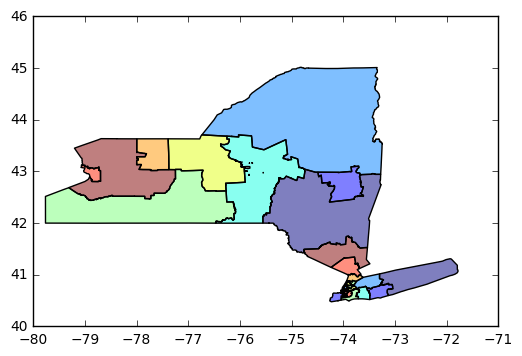

In [44]:
df.dissolve(by='Congressional District').plot()

In [45]:
with open(prediction_geojson_dir+'NY.geojson', 'w') as outfile:
    outfile.write(df.to_json())